<a href="https://colab.research.google.com/github/och0415/Introduction-to-Optical-Remote-Exploration-CN7500474-001-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
%pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
# import os.path
import matplotlib.pyplot as plt
import pandas as pd
# import rasterio
# from rasterio.plot import show
# from scipy.spatial import distance

In [ ]:
pic_total = "./data.jpg"

In [ ]:
from PIL import Image

In [ ]:
# image read
img = Image.open( pic_total )

In [ ]:
# transform numpy array
pix_total = np.array(img)

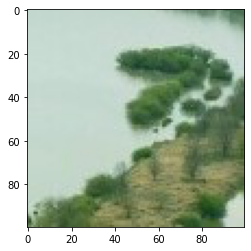

In [ ]:
# image show
plt.imshow(pix_total)

In [ ]:
pix_total.shape

(100, 100, 3)

In [ ]:
# reshape
pix_total = np.reshape(pix_total, (100*100,-1))

In [ ]:
pix_total.shape

(10000, 3)

In [ ]:
df_total = pd.DataFrame(pix_total)
df_total.columns=["R","G","B"]

In [ ]:
df_total

,R,G,B
0,195,216,207
1,194,215,206
2,194,215,206
3,194,215,206
4,195,216,207
...,...,...,...
9995,203,216,199
9996,200,214,197
9997,199,213,196
9998,198,212,195


 10000개의 픽셀으로 표현된 이미지에서 pca를 통한 주성분 분석으로  
 각 픽셀의 특징을 파악하고 변환된 데이터를 KNN알고리즘으로 분류(water, soil, grass)

In [ ]:
# 분류의 기준이되는 픽셀(5x5) 이미지를 가져온다.

In [ ]:
pic_water = "water.jpg"

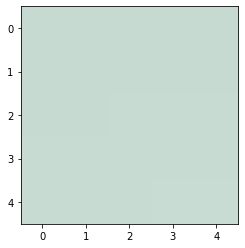

In [ ]:
img_water = Image.open( pic_water )
pix_water = np.array(img_water)
plt.imshow(pix_water)

In [ ]:
pix_water.shape

(5, 5, 3)

In [ ]:
pix_water = np.reshape(pix_water, (5*5, -1))
pix_water.shape

(25, 3)

In [ ]:
df_water = pd.DataFrame(pix_water)
df_water.columns=["R","G","B"]
df_water

,R,G,B
0,198,218,209
1,198,218,209
2,198,218,209
3,198,218,209
4,198,218,209
5,198,218,209
6,198,218,209
7,198,218,209
8,198,218,209
9,198,218,209


In [ ]:
# label 지정
# water = 0
df_water['Class']='0'
df_water

,R,G,B,Class
0,198,218,209,0
1,198,218,209,0
2,198,218,209,0
3,198,218,209,0
4,198,218,209,0
5,198,218,209,0
6,198,218,209,0
7,198,218,209,0
8,198,218,209,0
9,198,218,209,0


In [ ]:
pic_grass = "grass.jpg"

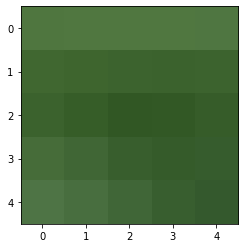

In [ ]:
im_grass = Image.open( pic_grass )
pix_grass = np.array(im_grass)
plt.imshow(pix_grass)

In [ ]:
pix_grass.shape

(5, 5, 3)

In [ ]:
pix_grass = np.reshape(pix_grass, (5*5, -1))
pix_grass.shape

(25, 3)

In [ ]:
df_grass = pd.DataFrame(pix_grass)
df_grass.columns=["R","G","B"]
df_grass

,R,G,B
0,79,118,63
1,80,119,64
2,80,119,64
3,80,119,64
4,79,118,65
5,64,103,48
6,62,101,46
7,60,99,46
8,59,98,45
9,60,99,46


In [ ]:
# label 지정
# grass = 1
df_grass['Class']='1'
df_grass

,R,G,B,Class
0,79,118,63,1
1,80,119,64,1
2,80,119,64,1
3,80,119,64,1
4,79,118,65,1
5,64,103,48,1
6,62,101,46,1
7,60,99,46,1
8,59,98,45,1
9,60,99,46,1


In [ ]:
pic_soil = "soil.jpg"

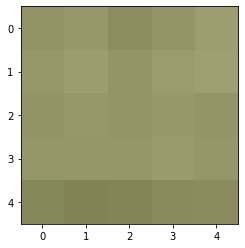

In [ ]:
im_soil = Image.open( pic_soil )
pix_soil = np.array(im_soil)
plt.imshow(pix_soil)

In [ ]:
pix_soil.shape

(5, 5, 3)

In [ ]:
pix_soil = np.reshape(pix_soil, (5*5, -1))
pix_soil.shape

(25, 3)

In [ ]:
pix_soil = np.array(pix_soil)
df_soil = pd.DataFrame(pix_soil)
df_soil.columns=["R","G","B"]
df_soil

,R,G,B
0,145,146,102
1,150,151,107
2,139,140,96
3,147,148,104
4,158,157,113
5,150,151,107
6,155,156,112
7,147,148,104
8,154,155,111
9,157,158,114


In [ ]:
df_soil['Class']='2'
df_soil

,R,G,B,Class
0,145,146,102,2
1,150,151,107,2
2,139,140,96,2
3,147,148,104,2
4,158,157,113,2
5,150,151,107,2
6,155,156,112,2
7,147,148,104,2
8,154,155,111,2
9,157,158,114,2


In [ ]:
df_A = pd.concat((df_water,df_grass,df_soil),axis=0).reset_index()
df_A = df_A[["R", "G", "B", "Class"]]
df_A

,R,G,B,Class
0,198,218,209,0
1,198,218,209,0
2,198,218,209,0
3,198,218,209,0
4,198,218,209,0
...,...,...,...,...
70,133,136,91,2
71,129,130,86,2
72,131,132,88,2
73,137,138,94,2


In [ ]:
# 학습데이터(train)과 라벨데이터(label)으로 분리
train = df_A[["R", "G", "B"]]
# label은 KNN알고리즘의 학습에 사용됨
label = df_A[["Class"]]

print(f"train shape : {train.shape}")
print(f"label shape : {label.shape}")

train shape : (75, 3)
label shape : (75, 1)


In [ ]:
# 학습할 데이터의 주성분 분석(pca)를 통해 데이터를 변환한다.
# 변환할 때 픽셀값을 넣음으로써 이 색이 어떤 특징을 가지는지 알수있다.

In [ ]:
# sci-kit learn에서 제공하는 PCA라이브러리를 사용한다.
from sklearn.decomposition import PCA

In [ ]:
# 주성분 분석을 통해 학습하는 데이터(train)의 차원(3) 보다 저차원으로 변형하므로 1 혹은 2를 입력한다.
# 여기에서는 2를 입력하고, 학습 데이터는 ("R", "G", "B")로 구성되어있으므로 3차원이라고 할 수 있다.
pca = PCA(n_components=2)

In [ ]:
# 주성분 분석 후 변형
pca_train = pca.fit_transform(train)
pca_train

array([[-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-123.67030433,   -8.74894559],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-125.38842222,   -8.65638343],
       [-127.1065401 ,   -8.56382126],
       [-127.1065401 ,   -8.56382126],
       [  89.50026812,   

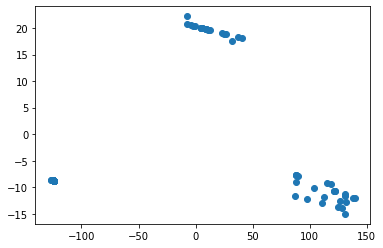

In [ ]:
# 각 데이터마다 비슷하게 분석된것 처럼 보인다.
# scatter를 이용해 시각적으로 표현한다.
plt.scatter(pca_train[:, 0], pca_train[:, 1])

# 확인 결과 3개 부분으로 분명하게 구분된것을 확인할 수 있다.

In [ ]:
# 주성분 분석의 결과를 이용하여 KNN알고리즘을 통해 분류를 수행한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# 학습, 학습결과 확인용 데이터 분리
# label은 pca분석 이전에 분리된 데이터
train_X, test_X, train_label, test_label=train_test_split(pca_train, label)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(train_X,train_label)

C:\Anaconda\anaconda3\envs\activ2\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 주성분 분석으로 인해 분명히 분류되었으므로 어찌보면 당연한 결과이다.
knn.score(test_X,test_label)

1.0

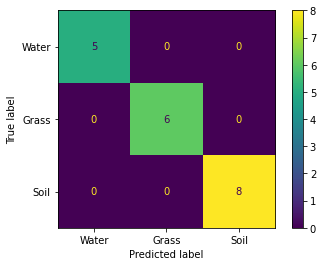

In [ ]:
# 성능에 대한 시각화
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
metrics = confusion_matrix(test_label,knn.predict(test_X))
disp = ConfusionMatrixDisplay(confusion_matrix = metrics,
                             display_labels = ["Water", "Grass", "Soil"])
disp.plot()

In [ ]:
# 해당 KNN모델으로 원래 있던 pix_total의 픽셀을 분석해 본다.
# 먼저, 주성분 분석했던것으로 기존 total의 데이터를 차원축소한다.
pca_total = pca.transform(df_total)
# 차원 축소된 데이터를 추론하여 결과를 저장한다.
prediction = knn.predict(pca_total)

In [ ]:
prediction

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [ ]:
prediction.shape

(10000,)

In [ ]:
predict_reshaped = prediction.reshape(100, 100, )
# reshape과정에서 뒤집어져서 원래대로 변환
predict_flipped = np.flip(predict_reshaped, axis=0)
predict_flipped.shape

(100, 100)

In [ ]:
df_predict = pd.DataFrame(predict_flipped.astype(np.int))

C:\Users\김도균\AppData\Local\Temp/ipykernel_17804/4070534843.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_predict = pd.DataFrame(predict_flipped.astype(np.int))


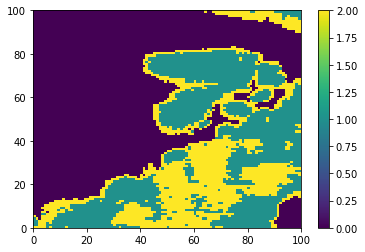

In [ ]:
plt.pcolor(df_predict)
plt.colorbar()
plt.show()

In [ ]:
# 0과 1, 2로 영역이 잘 분류되었음을 볼 수 있다.